# Importing data

In [1]:
import numpy as np
import pandas as pd
import pycountry
import re
import matplotlib

In [2]:
data=pd.read_csv("GSAF5.csv",encoding='latin1')

In [3]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [4]:
data.shape

(5992, 24)

# Cleaning data

In [5]:
data.isna().sum()/len(data)*100

Case Number                0.000000
Date                       0.000000
Year                       0.000000
Type                       0.000000
Country                    0.717623
Area                       6.708945
Location                   8.277704
Activity                   8.795060
Name                       3.337784
Sex                        9.462617
Age                       44.742991
Injury                     0.450601
Fatal (Y/N)                0.317089
Time                      53.621495
Species                   48.965287
Investigator or Source     0.250334
pdf                        0.000000
href formula               0.016689
href                       0.050067
Case Number.1              0.000000
Case Number.2              0.000000
original order             0.000000
Unnamed: 22               99.983311
Unnamed: 23               99.966622
dtype: float64

In [6]:
to_drop= [x for x in data if data[x].isna().sum()/len(data)*100>40 ]
to_drop
# We will proceed to drop the columns whit more than 40% of NaNs

['Age', 'Time', 'Species ', 'Unnamed: 22', 'Unnamed: 23']

In [7]:
data=data.drop(to_drop,axis=1)
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Struck by fin on chest & leg,N,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [8]:
# Checking that the number of columns have been reduced by 5
data.shape

(5992, 19)

In [9]:
# Lets make all column names lower case and replace " " for "_" and "." for ""
data.columns=(data.columns
                 .str.lower()
                 .str.strip()
                 .str.replace(" ","_")
                 .str.replace(".",""))

In [10]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'injury', 'fatal_(y/n)',
       'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number1',
       'case_number2', 'original_order'],
      dtype='object')

In [11]:
data.query("case_number != case_number2 & case_number != case_number1")

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal_(y/n),investigator_or_source,pdf,href_formula,href,case_number1,case_number2,original_order
169,2015.07-10,10-Jul-15,2015,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,"No injury, shark bumped & damaged board",N,"KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5823
4719,1934.01.08.R,Reported 08-Feb-1934,1934,Boating,TURKEY,Istanbul,"Haydarpasa jetty, Istanbul",Fishing,2 males,M,No injury,N,"C. Moore, GSAF",1924.02.08.R-Turkey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.02.08.R,1934.02.08.R,1274


In [12]:
# there are only two rows whose case_number1 or case_number2 apparently differ from the case_number.
# if payed attention they are the same. So we will proceed to drop the case_number1 and case_number2 columns
data=data.drop(["case_number2","case_number1"],axis=1)
data.head()

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal_(y/n),investigator_or_source,pdf,href_formula,href,original_order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Struck by fin on chest & leg,N,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5989


In [13]:
# Checking that the number of columns have been reduced by two
data.shape

(5992, 17)

In [14]:
#Here we found the NaN in href_formula and overwrite it with the value in href
for index,item in data.iteritems():
    if index == "href_formula":
        lst=data.loc[pd.isna(data[index]), :].index
        for l in lst:
            data.loc[l,index]=data.loc[l,"href"]

In [15]:
#We check that the formula worked
pd.isna(data["href_formula"]).sum()

0

In [16]:
# Now we can drop the href since 99% of the values are equal
len(data.query("href_formula == href"))/len(data)*100

99.11548731642189

In [17]:
# We drop as well the pdf column since href_formula has the same objective and added more value than pdf column
data=data.drop(["href","pdf"],axis=1)
data

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal_(y/n),investigator_or_source,href_formula,original_order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Struck by fin on chest & leg,N,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,FATAL,Y,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,6
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,FATAL,Y,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,5
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,FATAL,Y,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,4
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,FATAL,Y,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,3


In [18]:
data["country"]=data["country"].str.strip().str.title().str.strip("?()")

In [19]:
not_in_list=[]
for index, value in data["country"].iteritems():
    try:
        data["country"].loc[index]=pycountry.countries.lookup(value).alpha_2  
    except:
        not_in_list.append(str(value))


/Users/amh/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
#365 rows have not been identified, that are 76 distinct values
print(f"{len(not_in_list)} rows not identified. {len(set(not_in_list))} distinct values not identified")

365 rows not identified. 76 distinct values not identified


In [21]:
not_in_list = set(not_in_list)

In [22]:
data.head()

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal_(y/n),investigator_or_source,href_formula,original_order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,US,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,US,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,US,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AU,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Struck by fin on chest & leg,N,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AU,Victoria,Bells Beach,Surfing,male,M,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5989


In [23]:
#Create a copy of the DF and create two new columns based on the case_number column: year_split and month_split

new_df=data.copy()
years=[]
months=[]
for index, value in new_df["case_number"].iteritems():
    splitting=re.split('\.|\-|\,',value)
    #print(splitting)
    years.append(splitting[0])
    months.append(splitting[1])
    
#months    
new_df=new_df.assign(year_split=years,month_split=months)

In [24]:
new_df

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal_(y/n),investigator_or_source,href_formula,original_order,year_split,month_split
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,US,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5993,2016,09
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,US,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5992,2016,09
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,US,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5991,2016,09
3,2016.09.17,17-Sep-16,2016,Unprovoked,AU,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Struck by fin on chest & leg,N,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5990,2016,09
4,2016.09.15,16-Sep-16,2016,Unprovoked,AU,Victoria,Bells Beach,Surfing,male,M,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,5989,2016,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AU,Western Australia,Roebuck Bay,Diving,male,M,FATAL,Y,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,6,ND,0005
5988,ND.0004,Before 1903,0,Unprovoked,AU,Western Australia,NaN,Pearl diving,Ahmun,M,FATAL,Y,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,5,ND,0004
5989,ND.0003,1900-1905,0,Unprovoked,US,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,FATAL,Y,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,4,ND,0003
5990,ND.0002,1883-1889,0,Unprovoked,PA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,FATAL,Y,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,3,ND,0002


In [25]:
no_rows_not_real_months=len([list(new_df["month_split"]).count(x) for x in set(list(new_df["month_split"])) if len(x)>2])
no_total_rows=len(new_df)
print(f"The rows without data, or real month data, represent only a {no_rows_not_real_months/no_total_rows*100}%")

The rows without data, or real month data, represent only a 2.069425901201602%


In [26]:
# we see that there are only 124 rows that are not really months, they are "dirty data" 
# we will eliminate these rows since they only represent a 2.07%
new_df = new_df.drop(new_df[new_df["month_split"].map(len) > 2].index)
len(new_df)

5868

In [27]:
# Check whether we can make original_order
if len(new_df)>len(set(list(new_df["original_order"]))):
    print("There are duplicates")
else:
    print("We can make it an index")

There are duplicates


In [28]:
#Looks like there are duplicates so we won't make it our index
# Check whether we can make case_number
if len(new_df)>len(set(list(new_df["case_number"]))):
    print("There are duplicates")
else:
    print("We can make it an index")

There are duplicates


In [29]:
# Investigator_or_source split by ","
new_df["investigator_or_source"]=new_df["investigator_or_source"].fillna("unknown,")
new_col=[]
for index, value in new_df["investigator_or_source"].iteritems():
    splitting=re.split('\,',value)
    new_col.append(splitting[0])


new_df=new_df.assign(investigator_or_source=new_col)

In [30]:
# Final columns clean up
new_df=new_df.fillna("unknown")
print(set(list(new_df["sex"])))
print(set(list(new_df["fatal_(y/n)"])))

{'F', '.', 'N', 'M', 'unknown', 'M ', 'lli'}
{'F', 'N', ' N', 'UNKNOWN', 'N ', 'unknown', 'Y', 'n', '#VALUE!'}


In [31]:
new_df["fatal_(y/n)"]=(new_df["fatal_(y/n)"].str.strip()
                                            .str.lower()
                                            .str.replace("#VALUE!","unknown"))
new_df["sex"]=(new_df["sex"].str.strip()
                            .str.lower()
                            .str.replace("lli","unknown"))
new_df

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal_(y/n),investigator_or_source,href_formula,original_order,year_split,month_split
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,US,Florida,"New Smyrna Beach, Volusia County",Surfing,male,m,Minor injury to thigh,n,Orlando Sentinel,http://sharkattackfile.net/spreadsheets/pdf_di...,5993,2016,09
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,US,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,m,Lacerations to hands,n,Orlando Sentinel,http://sharkattackfile.net/spreadsheets/pdf_di...,5992,2016,09
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,US,Florida,"New Smyrna Beach, Volusia County",Surfing,male,m,Lacerations to lower leg,n,Orlando Sentinel,http://sharkattackfile.net/spreadsheets/pdf_di...,5991,2016,09
3,2016.09.17,17-Sep-16,2016,Unprovoked,AU,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,m,Struck by fin on chest & leg,n,The Age,http://sharkattackfile.net/spreadsheets/pdf_di...,5990,2016,09
4,2016.09.15,16-Sep-16,2016,Unprovoked,AU,Victoria,Bells Beach,Surfing,male,m,No injury: Knocked off board by shark,n,The Age,http://sharkattackfile.net/spreadsheets/pdf_di...,5989,2016,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,1554.00.00,Ca. 1554,1554,Unprovoked,FR,Nice & Marseilles,unknown,unknown,males (wearing armor),m,unknown,unknown,G. Rondelet,http://sharkattackfile.net/spreadsheets/pdf_di...,130,1554,00
5864,1543.00.00,Ca. 1543,1543,Unprovoked,VE,Magarita or Cubagua Islands,unknown,Pearl diving,Indian slave,m,FATAL,y,J. Castro,http://sharkattackfile.net/spreadsheets/pdf_di...,129,1543,00
5865,0500.00.00,Circa 500 A.D.,500,Unprovoked,MX,unknown,unknown,unknown,male,unknown,Foot severed,n,J. Castro,http://sharkattackfile.net/spreadsheets/pdf_di...,128,0500,00
5866,0077.00.00,77 A.D.,77,Unprovoked,unknown,Ionian Sea,unknown,Sponge diving,males,m,FATAL,y,Perils mentioned by Pliny the Elder (23 A.D. t...,http://sharkattackfile.net/spreadsheets/pdf_di...,127,0077,00


# Exporting the data

In [32]:
# For the benefit of data analysis, we are interested to analyze the incidents happenning from 1900 onwards
# Lets create a new dataframe with the desire rows

# first we change the type of the column year_split
new_df["year_split"]=new_df["year_split"].astype("int64")

# second we make a list of the relevant columns we want to have in our new table to analyze
relevant_columns=['case_number', 'year_split', 'month_split', 'type', 'country', 'area',
       'activity', 'sex', 'injury', 'fatal_(y/n)', 'investigator_or_source', 'href_formula']

# now we create a new dataframe(table)
table_to_analyze = new_df[(new_df["year_split"]>=1900)][relevant_columns]


table_to_analyze.head()

,case_number,year_split,month_split,type,country,area,activity,sex,injury,fatal_(y/n),investigator_or_source,href_formula
0,2016.09.18.c,2016,09,Unprovoked,US,Florida,Surfing,m,Minor injury to thigh,n,Orlando Sentinel,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,2016,09,Unprovoked,US,Florida,Surfing,m,Lacerations to hands,n,Orlando Sentinel,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,2016,09,Unprovoked,US,Florida,Surfing,m,Lacerations to lower leg,n,Orlando Sentinel,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,2016,09,Unprovoked,AU,Victoria,Surfing,m,Struck by fin on chest & leg,n,The Age,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,2016,09,Unprovoked,AU,Victoria,Surfing,m,No injury: Knocked off board by shark,n,The Age,http://sharkattackfile.net/spreadsheets/pdf_di...


In [33]:
table_to_analyze.shape

(5325, 12)

In [34]:
table_to_analyze.to_pickle("shark_cleaned.pkl")
table_to_analyze.to_csv("shark_cleaned.csv")

# Analyzing the data

now we create a new dataframe where we can see the top 5 countries with reported incidents

In [35]:
top_country=pd.DataFrame((table_to_analyze.groupby(["country"])["country"].count()).sort_values(ascending=False))
top_country.columns=["count"]
top_country.reset_index(drop=False,inplace=True)

In [36]:
top_country.head()

,country,count
0,US,1992
1,AU,1124
2,ZA,535
3,PG,129
4,BR,100


In [37]:
# create a DataFrame to see what are the most frequent activities people were praticing when they got attacked

In [38]:
top_country_activity=pd.DataFrame((table_to_analyze.groupby(["country","activity"])["country","activity"].count()))
                                
top_country_activity.columns=["country_count","activity_count"]
top_country_activity=top_country_activity.sort_values(by="country_count",ascending=False)

top_country_activity.head(10)

country_count  activity_count
country activity                               
US      Surfing             531             531
        Swimming            264             264
AU      Surfing             170             170
        Swimming            128             128
US      unknown             114             114
AU      unknown              99              99
US      Wading               98              98
        Fishing              95              95
ZA      Surfing              93              93
AU      Fishing              92              92

In [39]:
# Check the years with most accidents
year_accidents=pd.DataFrame((table_to_analyze.groupby(["year_split"])["year_split"].count()))
year_accidents.columns=["year_count"]
year_accidents=year_accidents.sort_values(by="year_count",ascending=False)
year_accidents.head(10)

,year_count
year_split,
2015,139
2011,128
2014,125
2013,122
2008,121
2009,120
2012,117
2007,112
2016,103


In [40]:
# Check most frequent months of having an accident
month_accidents=pd.DataFrame((table_to_analyze.groupby(["month_split"])["month_split"].count()))
month_accidents.columns=["month_count"]
month_accidents=month_accidents.sort_values(by="month_count",ascending=False)
month_accidents

,month_count
month_split,
07,585
08,534
09,482
01,456
06,430
10,388
12,383
04,380
03,366


In [41]:
# Check most frequent type of accident, e.g. whteher it was provoked or not
type_distrib=pd.DataFrame((table_to_analyze.groupby(["type"])["type"].count()))
type_distrib.columns=["type_count"]
type_distrib=type_distrib.sort_values(by="type_count",ascending=False)
type_distrib

,type_count
type,
Unprovoked,3885
Provoked,525
Invalid,451
Boat,194
Sea Disaster,181
Boating,89


# Some representation of the analysis done

In [42]:
top_country.head(5).plot(x='country', y='count',kind="bar")

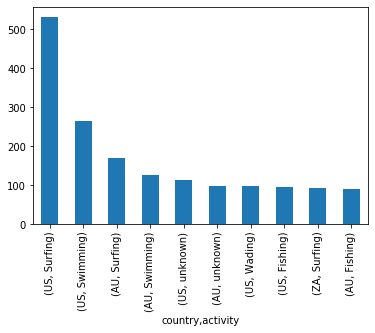

In [43]:
top_country_activity["activity_count"].head(10).plot(kind="bar")

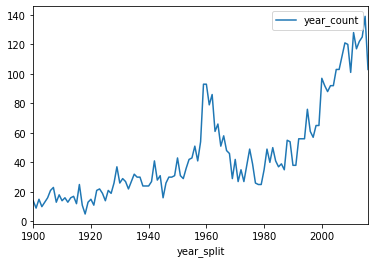

In [44]:
year_accidents.sort_values(by="year_split").plot()

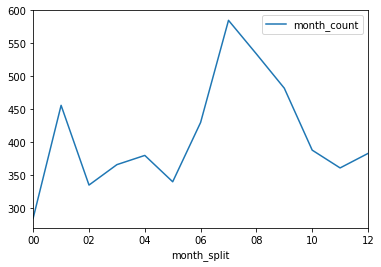

In [45]:
month_accidents.sort_values(by="month_split").plot()

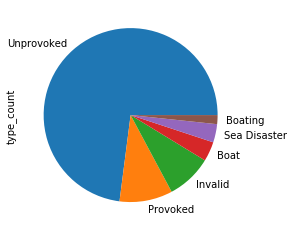

In [46]:
type_distrib["type_count"].plot.pie()